In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Install File


In [3]:
nameCSV = 'C_B_G_file.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]
len(lat)

2411

## Calculate mean value of each satellite track 

In [4]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2205


## Make ndarray(alltime) and list(days2) that has dates

In [5]:
alltime = num2date(tt[:],u'days since 1985-01-01 00:00:00 UTC')

In [6]:
for k in range(len(days)):
    print wh[days[k]], alltime[k]

2.700812578201294 1985-04-01 07:44:52.125977
2.226555824279785 1985-04-24 09:24:40.746528
1.666750192642212 1985-05-17 11:04:17.078125
2.5757501125335693 1985-05-20 11:13:06.295898
1.2649999856948853 1985-06-26 02:58:29.750487
2.4064617156982417 1985-07-05 14:32:17.463942
1.848000168800354 1985-07-28 16:11:55.262498
2.2143335342407227 1985-07-31 16:20:42.515627
0.5731765031814575 1985-09-15 19:39:47.702207
1.6660001277923584 1985-10-08 21:19:13.951173
1.3996667861938477 1985-10-31 22:58:29.697917
2.231799840927124 1985-11-03 23:07:14.012499
1.0398334264755251 1985-12-10 14:51:42.582031
0.6495000123977661 1985-12-13 15:00:26.898441
0.625 1986-01-02 16:30:52.937502
0.8496250510215759 1986-01-12 04:04:35.771729
2.6090712547302246 1986-01-28 18:18:44.251115
1.4392000436782837 1986-02-04 05:43:40.249478
2.091571569442749 1986-02-27 07:22:40.318080
2.407249927520752 1986-03-02 07:31:23.163085
3.2320001125335693 1986-03-22 09:01:36.468749
2.7468183040618896 1986-03-25 09:10:20.336648
0.926411

1.924846053123474 2009-09-27 03:15:06.557813
0.8765715190342495 2009-10-02 15:37:33.729168
1.4671430133637928 2009-10-04 12:00:40.921874
1.6784000396728516 2009-10-07 01:13:38.300828
1.008125066757202 2009-10-12 13:36:05.796876
2.5602002143859863 2009-10-16 23:12:09.554687
2.2497144426618303 2009-10-16 23:30:43.857292
1.805809565952846 2009-10-22 11:34:37.192706
1.9190001487731931 2009-10-26 21:10:40.994532
1.959266662597656 2009-11-01 09:33:08.575521
2.367136521772905 2009-11-05 19:09:12.238281
1.258400058746338 2009-11-08 12:00:41.337501
1.3927620479038785 2009-11-11 07:31:39.449219
1.6512858527047294 2009-11-15 17:07:43.967968
2.139533519744873 2009-11-20 23:30:43.206250
1.7008333206176758 2009-11-21 05:30:10.745442
1.7801430111839658 2009-11-25 15:06:15.124218
2.4518001079559326 2009-12-01 03:28:41.984934
1.895600128173828 2009-12-05 13:04:45.759766
1.272250056266785 2009-12-11 01:27:13.051432
1.1505001241510564 2009-12-13 12:00:39.017090
1.0920001029968265 2009-12-15 11:03:17.0406

In [10]:
days2 = [] #daystart
for k in range(len(alltime)):
       
    t1 = alltime[k]
    if k == 0: #get day 0. Then else: every day after that
        days2.append(alltime[k])
        dd =alltime[k]
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days2.append(alltime[k])
            it += 1
            dd = alltime[k]
            
            
print 'Number of Satellite Tracks:', len(tt[days])

 Number of Satellite Tracks: 2205


In [8]:
days2

[datetime.datetime(1985, 4, 1, 7, 44, 52, 125977),
 datetime.datetime(1985, 4, 24, 9, 24, 40, 746528),
 datetime.datetime(1985, 5, 17, 11, 4, 17, 78125),
 datetime.datetime(1985, 5, 20, 11, 13, 6, 295898),
 datetime.datetime(1985, 6, 26, 2, 58, 29, 750487),
 datetime.datetime(1985, 7, 5, 14, 32, 17, 463942),
 datetime.datetime(1985, 7, 28, 16, 11, 55, 262498),
 datetime.datetime(1985, 7, 31, 16, 20, 42, 515627),
 datetime.datetime(1985, 9, 15, 19, 39, 47, 702207),
 datetime.datetime(1985, 10, 8, 21, 19, 13, 951173),
 datetime.datetime(1985, 10, 31, 22, 58, 29, 697917),
 datetime.datetime(1985, 11, 3, 23, 7, 14, 12499),
 datetime.datetime(1985, 12, 10, 14, 51, 42, 582031),
 datetime.datetime(1985, 12, 13, 15, 0, 26, 898441),
 datetime.datetime(1986, 1, 2, 16, 30, 52, 937502),
 datetime.datetime(1986, 1, 12, 4, 4, 35, 771729),
 datetime.datetime(1986, 1, 28, 18, 18, 44, 251115),
 datetime.datetime(1986, 2, 4, 5, 43, 40, 249478),
 datetime.datetime(1986, 2, 27, 7, 22, 40, 318080),
 dateti

## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$


In [11]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [12]:
T = waveperiod(wh,ws)
print T
print len(T),len(wh)

[6.77643209 6.61147856 6.43733401 ... 5.64967776 5.2767476  5.61217235]
2411 2411


In [13]:
dayswh = wh[days] #wave height for each satellite pass
daysTz = T[days]

print len(dayswh)
print len(daysTz)

2205
2205


In [14]:
dayswh

array([2.70081258, 2.22655582, 1.66675019, ..., 1.79329407, 1.39050007,
       1.54500008])

In [15]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "period":daysTz})
df.to_csv("./melville_timeseries.csv", sep=',',index=False)
df

,date,period,wh
0,1985-04-01 07:44:52.125977,6.776432,2.700813
1,1985-04-24 09:24:40.746528,6.611479,2.226556
2,1985-05-17 11:04:17.078125,6.437334,1.666750
3,1985-05-20 11:13:06.295898,5.861532,2.575750
4,1985-06-26 02:58:29.750487,5.835282,1.265000
5,1985-07-05 14:32:17.463942,6.076965,2.406462
6,1985-07-28 16:11:55.262498,6.670873,1.848000
7,1985-07-31 16:20:42.515627,5.987101,2.214334
8,1985-09-15 19:39:47.702207,3.850142,0.573177
9,1985-10-08 21:19:13.951173,5.929320,1.666000


## Get rolling average wh based on 30 Days

In [16]:
yrolling = df.rolling('30D', on = 'date', min_periods = 1).mean()

In [17]:
yrolling

,date,period,wh
0,1985-04-01 07:44:52.125977,6.776432,2.700813
1,1985-04-24 09:24:40.746528,6.693955,2.463684
2,1985-05-17 11:04:17.078125,6.524406,1.946653
3,1985-05-20 11:13:06.295898,6.303448,2.156352
4,1985-06-26 02:58:29.750487,5.835282,1.265000
5,1985-07-05 14:32:17.463942,5.956123,1.835731
6,1985-07-28 16:11:55.262498,6.373919,2.127231
7,1985-07-31 16:20:42.515627,6.244980,2.156265
8,1985-09-15 19:39:47.702207,3.850142,0.573177
9,1985-10-08 21:19:13.951173,4.889731,1.119588


In [20]:
wh_rolling=yrolling['wh']

period_rolling=yrolling['period']

## Incorporate rolling average wh into dataframe

In [21]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "wh_rolling":wh_rolling, "period":daysTz, "period_rolling":period_rolling })
df.to_csv("./CBG_timeseries.csv", sep=',',index=False)
df

,date,period,period_rolling,wh,wh_rolling
0,1985-04-01 07:44:52.125977,6.776432,6.776432,2.700813,2.700813
1,1985-04-24 09:24:40.746528,6.611479,6.693955,2.226556,2.463684
2,1985-05-17 11:04:17.078125,6.437334,6.524406,1.666750,1.946653
3,1985-05-20 11:13:06.295898,5.861532,6.303448,2.575750,2.156352
4,1985-06-26 02:58:29.750487,5.835282,5.835282,1.265000,1.265000
5,1985-07-05 14:32:17.463942,6.076965,5.956123,2.406462,1.835731
6,1985-07-28 16:11:55.262498,6.670873,6.373919,1.848000,2.127231
7,1985-07-31 16:20:42.515627,5.987101,6.244980,2.214334,2.156265
8,1985-09-15 19:39:47.702207,3.850142,3.850142,0.573177,0.573177
9,1985-10-08 21:19:13.951173,5.929320,4.889731,1.666000,1.119588


## Calculate Wave Power

### Wave Energy Flux
$P = ECg$

### Total Wave Energy
$E = \frac{1}{8} \left(pgH_s^2\right) $

### Wave energy speed / Wave Velocity
$Cg = \frac{gTz}{2\pi}n$



## Split into two, either side of date gap

In [33]:
print df.date[38]
print df.date[39]

1988-07-24 10:47:28.773437
1992-10-16 17:50:42.914062


In [34]:
#Period normal    
time1 = df.period[0:38]
time2 = df.period[39:-1]

#Period rolling
tt1 = df.period_rolling[0:38]
tt2 = df.period_rolling[39:-1]
        


#Hs normal
y1 = df.wh[0:38]
y2 = df.wh[39:-1]

#Hs rolling
yy1 = df.wh_rolling[0:38]
yy2 = df.wh_rolling[39:-1]


#Date
x1=df.date[0:38]
x2 = df.date[39:-1]

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


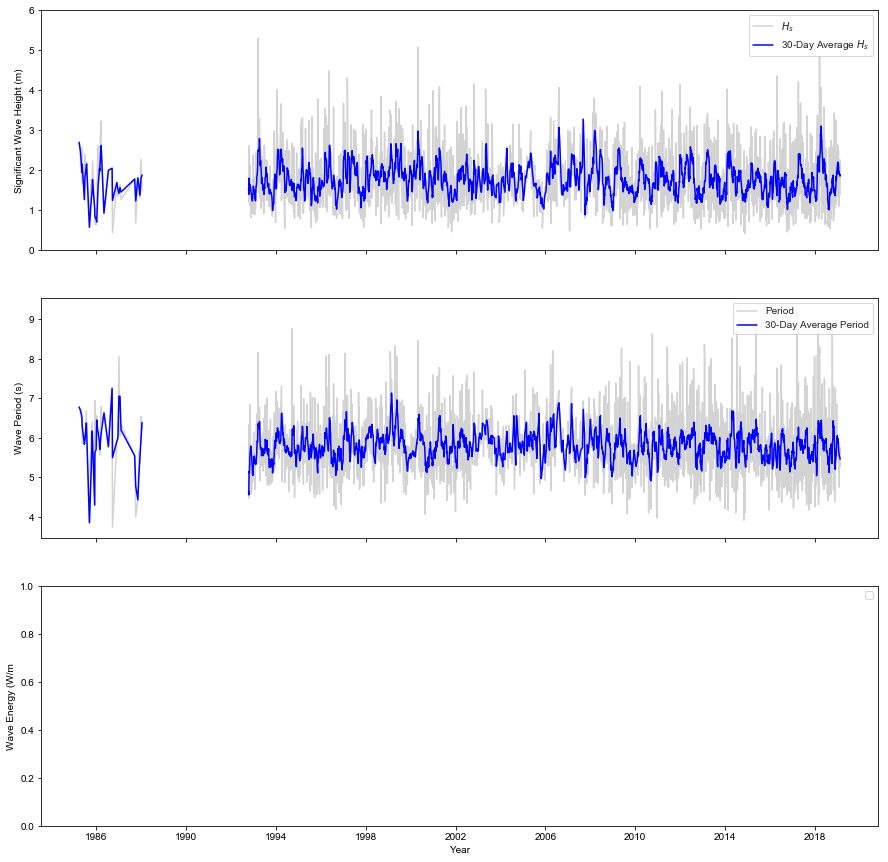

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex = True,figsize = (15,15))    


sns.set_style("white")
#fig.title("Innisfail 30 Day Moving Average Significant Wave Height")


#HS
#Before date break
ax1.plot(x1,y1,color='lightgrey',label="$H_s$")
ax1.plot(x1,yy1,color='blue',label="30-Day Average $H_s$")

#After date break
ax1.plot(x2,y2,color='lightgrey', label='False')
ax1.plot(x2,yy2,color='blue')

ax1.legend(labels=["$H_s$","30-Day Average $H_s$"], loc='upper right')
ax1.set_ylabel("Significant Wave Height (m)")
ax1.set_ylim(0,6)


#Wave Period 
#Before date break
ax2.plot(x1, time1, color='lightgrey')
ax2.plot(x1,tt1,color='blue')

#After date break
ax2.plot(x2,time2, color='lightgrey')
ax2.plot(x2,tt2,color='blue')

ax2.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax2.set_ylabel("Wave Period (s)")


#Wave Power - Need to add data
#Before date break
#ax3.plot(x1, time1)
#ax3.plot(x1,tt1)

#After date break
#ax3.plot(x2,time2)
#ax3.plot(x2,tt2)

ax3.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax3.set_ylabel("Wave Energy (W/m") #Check if watts/metre is correct


#Formatting

plt.xlabel("Year")

#"years = pd.date_range(start='1985',end='2020', periods=10)
years = pd.date_range('2008','2015', freq='AS')

plt.savefig("CBG_timeseries")

